# TaskServer介绍


## 概念

## web及server结构
## taskserver结构

## TODO

## 概念：前端 vs 后端

**前端：**用户能够感知到的，提供用户界面交互。使用的技术包括HTML，CSS，JS以及基于这类技术衍生的相应框架

**后端：**用户比较难以感知的，但却非常重要的。如提交分析按钮是一个前端按钮，但是实际提交到服务器上进行计算运行，并把计算的结果返回到客户端。

## 概念：服务 vs 任务（脚本）

**服务：** 常驻在服务器进程中，时刻响应客户端的请求，存在时空分离情况。

**任务（脚本）：** 有指定的入口及顺序，有预期的开始和结束节点。

## 概念：架构图

```mermaid
flowchart LR
  a(用户) <--> A
  A(scc前端) <--> B(scc后端)
  B <--> C(taskserver)
  C <--> D(qsub 集群)
  B <--> D
  B <--> MySQL
  B <--> MongoDB
```

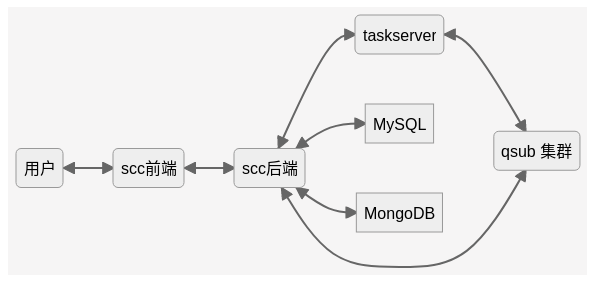

## web前端

In [1]:
!tree ../sccloud/oe-sccloud-web-milestones-master -L 2

../sccloud/oe-sccloud-web-milestones-master
├── build.prod.sh
├── build.sh
├── config
│   ├── config.dev.js
│   ├── config.js
│   ├── defaultSettings.js
│   ├── oneapi.json
│   ├── proxy.js
│   └── routes.js
├── deployment_prod.yaml
├── deployment.yaml
├── deploy.sh
├── Dockerfile
├── Jenkinsfile
├── jest.config.js
├── jsconfig.json
├── mock
│   ├── listTableList.js
│   ├── notices.js
│   ├── route.js
│   └── user.js
├── nginx
│   ├── nginx.conf
│   └── vhost.nginx.conf
├── package.json
├── package-lock.json
├── public
│   ├── CNAME
│   ├── demo
│   ├── favicon.ico
│   ├── icons
│   ├── logo.svg
│   └── pro_icon.svg
├── README.en.md
├── README.md
├── src
│   ├── access.js
│   ├── app.jsx
│   ├── assets
│   ├── components
│   ├── conf
│   ├── e2e
│   ├── global.jsx
│   ├── global.less
│   ├── layouts
│   ├── locales
│   ├── manifest.json
│   ├── models
│   ├── pages
│   ├── services
│   ├── service-worker.js
│   └── utils
└── tests
    ├── beforeTest.js
    ├── getBrowser.js
    ├── Pup

## web 后端

In [ ]:
# %load -r 18-47 ../sccloud/oe-sccloud-server-milestones-master/README.md
## 项目结构

```
├─app    # 项目代码目录
│  ├─config      # 配置文件目录
│  │  ├─anonymous.py  # 可匿名访问接口配置文件
│  │  ├─db.py         # 数据库连接配置文件，关系数据库，如mysql
│  │  ├─fastapi.py    # FastAPI项目配置文件
│  │  ├─mongo.py      # mongo数据库连接配置文件
│  │  └─redis.py      # redis连接配置文件
│  ├─controller  # 控制器层，API入口
│  ├─dao         # DAO层，数据访问对象
│  ├─model       # Model层，数据表对象
│  ├─schema      # Schema层，数据结构验证层，对API出入参数的校验、过滤、转换
│  ├─service     # Service层，业务逻辑处理层
│  ├─sql         # 原生SQL文件目录，复杂的SQL语句单独存放这里
│  ├─templates   # 模板目录，如html、excel、email等模板文件
│  ├─temporary   # 临时文件目录，运行过程中生成的临时文件存放
│  └─utils       # 工具箱
├─docker  # 项目docker运行脚步目录
│  ├─deploy.sh   # shell部署脚本
│  ├─deocker-compose.yml  # deocker-compose部署脚本
│  └─run.sh      # docker内运行项目脚本，采用uvicorn
├─res     # 项目静态资源目录，如附件、图片、视频等文件
├─venv    # python 虚拟环境目录
├─dev_run.py          # 开发模式运行项目
└─dev_db_2_model.py   # 根据已有数据库表生成 ORM 使用的 model.py
├─dev_model_2_db.py   # 根据已有 ORM 使用的 model.py 生成数据库表
└─dev_generate_model.py   # 基于Demo代码生成新的模块，省去复制粘贴
```

## taskserver

### 需求

需求1 
```
POST http://qsub-server-domain/tasks/add
参数为JSON body，示例如下
{
“cmd”: “cellranger.sh”, // 必填参数，任务执行命令行及默认参数
“workroot”: “”,// 必填参数
“projectId”: “”, // 必填参数，项目ID
“taskId”: “”, // 必填参数，任务执行ID
“priority”: -2 , // 非必填参数
“queue”: “big”, // 必填参数
“slot”: 4 // 必填参数
}
qsub命令示例：qsub -pe smp [slot] -q [queue] -V projectId:[projectId]:taskId:[taskId]
[cmd]
返回 JSON 结果
{
“success”: 1, // 返回操作成功与否，1为成功，0为失败
“error”: “”, // 失败时返回错误信息，调试用，不展示给用户
“qsubId”: “” // 成功时返回，取消任务时使用
}
```

需求2
```
POST http://qsub-server-domain/tasks/remove
参数为JSON body，示例如下
{
“qsubId”: “”, // 必填参数，添加任务时返回的qsubId
}
返回 JSON 结果
{
“success”: 1, // 返回操作成功与否，1为成功，0为失败
“error”: “”, // 失败时返回错误信息，调试用，不展示给用户
}
```

In [34]:
!tree taskserver -I "*.pyc|utils|tools|pipeline|datasets|__pycache__"

taskserver
├── cli.py
├── core.py
├── __init__.py
├── items.py
├── __main__.py
└── settings.py

0 directories, 6 files


In [ ]:
# %load taskserver/core.py
from fastapi import FastAPI
from subprocess import run

from .items import TaskAddItem, TaskRemoveItem

app = FastAPI(title='scRNA qsub Server', description="欧易单细胞云平台qsub服务接口",
              version='0.2.0', )


@app.post('/tasks/add')
async def add_task(task: TaskAddItem):
    return task.run()


@app.post('/tasks/remove')
async def remove_task(task: TaskRemoveItem):
    q_id = task.qsubId
    job = q_id if len(q_id) == 6 else f'T{q_id}'
    output = run(['qdel', job], text=True, capture_output=True)
    return {'success': output.returncode, 'error': output.stderr}


In [ ]:
# %load -r 14-57 taskserver/items.py
class TaskAddItem(BaseModel):
    workroot: str
    projectId: str
    taskId: str
    priority: int = Field(0, ge=-1023, le=1024)
    queue: str = 'big'
    slot: int = 4
    cmd: str = 'python scRNA.py'

    def get_run_file(self, wd, pid, tid, i):
        return wd / f'{pid}_{tid}_{i}.sh'

    def build_cmd(self):
        pid, tid = self.projectId, self.taskId
        wd = Path(f'{self.workroot}/20{pid[:2]}/{pid[2:4]}/{pid}/{tid}')
        wd.mkdir(parents=True, exist_ok=True)
        i = 0
        run_file = self.get_run_file(wd, pid, tid, i)
        while run_file.exists():
            i += 1
            run_file = self.get_run_file(wd, pid, tid, i)
        cmd = f'qsub -V -cwd -pe smp {self.slot} -sync no -N T{self.taskId} ' \
              f'-p {self.priority} -q {self.queue}'.split()
        cmd.extend(['-wd', f'{wd}', f'{run_file}'])
        logger.debug('CMD: %s', ' '.join(cmd))
        run_file.write_text(f'# 脚本自动生成时间：{datetime.now()}\n'
                            f'# Qsub CMD: {" ".join(cmd)}\n'
                            f'module purge\n'
                            f'module load {SC_MODULE}\n'
                            f'{self.cmd} -t {self.taskId} -p {self.projectId} -w {wd}\n')

        return cmd

    def run(self):
        try:
            output = run(self.build_cmd(), text=True, capture_output=True, check=True)
            match_obj = re.search(r'Your job (\d+)', output.stdout)
            job_id = match_obj.group(1) if match_obj else ''
            return {'success': 1, 'error': output.stderr, 'qsubId': job_id}
        except CalledProcessError as e:
            return {'success': 0, 'error': e.stderr + e.stdout, 'qsubId': ''}
        except PermissionError as e:
            return {'success': 0, 'error': str(e), 'qsubId': ''}


In [ ]:
# %load taskserver/cli.py
"""Console script for taskserver."""
import fire
import uvicorn
LOGGING_CONFIG: dict = {
    "version": 1,
    "disable_existing_loggers": False,
    "formatters": {
        "default": {
            "()": "uvicorn.logging.DefaultFormatter",
            "fmt": "%(asctime)s %(levelprefix)s %(message)s",
            "use_colors": None,
        },
        "access": {
            "()": "uvicorn.logging.AccessFormatter",
            "fmt": '%(asctime)s %(levelprefix)s %(client_addr)s - "%(request_line)s" %(status_code)s',  # noqa: E501
        },
    },
    "handlers": {
        "default": {
            "formatter": "default",
            "class": "logging.StreamHandler",
            "stream": "ext://sys.stderr",
        },
        "access": {
            "formatter": "access",
            "class": "logging.StreamHandler",
            "stream": "ext://sys.stdout",
        },
    },
    "loggers": {
        "taskserver": {'handlers': ['default'], 'level': 'DEBUG'},
        "uvicorn": {"handlers": ["default"], "level": "INFO"},
        "uvicorn.error": {"level": "INFO"},
        "uvicorn.access": {"handlers": ["access"], "level": "INFO", "propagate": False},
    },
}


def run_app(host='0.0.0.0', port=8888, **kwargs):
    kwargs['log_config'] = LOGGING_CONFIG
    uvicorn.run("taskserver.core:app", host=host, port=port, **kwargs)


def main():
    fire.Fire(run_app)


In [ ]:
# %load taskserver/cli.py
"""Console script for taskserver."""
import fire
import uvicorn
LOGGING_CONFIG: dict = {
    "version": 1,
    "disable_existing_loggers": False,
    "formatters": {
        "default": {
            "()": "uvicorn.logging.DefaultFormatter",
            "fmt": "%(asctime)s %(levelprefix)s %(message)s",
            "use_colors": None,
        },
        "access": {
            "()": "uvicorn.logging.AccessFormatter",
            "fmt": '%(asctime)s %(levelprefix)s %(client_addr)s - "%(request_line)s" %(status_code)s',  # noqa: E501
        },
    },
    "handlers": {
        "default": {
            "formatter": "default",
            "class": "logging.StreamHandler",
            "stream": "ext://sys.stderr",
        },
        "access": {
            "formatter": "access",
            "class": "logging.StreamHandler",
            "stream": "ext://sys.stdout",
        },
    },
    "loggers": {
        "taskserver": {'handlers': ['default'], 'level': 'DEBUG'},
        "uvicorn": {"handlers": ["default"], "level": "INFO"},
        "uvicorn.error": {"level": "INFO"},
        "uvicorn.access": {"handlers": ["access"], "level": "INFO", "propagate": False},
    },
}

# from taskserver import core
# from taskserver.oesc_task import oesc_task


def run_app(host='0.0.0.0', port=8888, **kwargs):
    from . import settings
    kwargs = settings.update(kwargs)
    kwargs['log_config'] = LOGGING_CONFIG
    uvicorn.run("taskserver.core:app", host=host, port=port, **kwargs)


def main():
    fire.Fire(run_app)


In [ ]:
# %load -r 14- setup.py
requirements = ['fire',
                'fastapi',
                'uvicorn',
                'cairosvg == 2.2.1',
                'pandas == 1.3.5',
                'selenium', ]

setup_requirements = ['pytest-runner', ]

test_requirements = ['pytest>=3', ]

# setup的更多细节配置见 https://setuptools.readthedocs.io/en/latest/
setup(
    author="OE Biotech Team",
    author_email='xuebiao.wu@oebiotech.com',
    python_requires='>=3.7',
    classifiers=[
        'Development Status :: 2 - Pre-Alpha',
        'Intended Audience :: Developers',
        'Natural Language :: English',
        'Programming Language :: Python :: 3',
        'Programming Language :: Python :: 3.7',
        'Programming Language :: Python :: 3.8',
        'Programming Language :: Python :: 3.9',
        'Programming Language :: Python :: 3.10',
    ],
    description="qsub 投递的任务守护进程及web服务",
    entry_points={
        'console_scripts': [
            'taskserver=taskserver.cli:main',
        ],
    },
    install_requires=requirements,
    long_description=readme + '\n\n' + history,
    long_description_content_type='rst',
    # 该项与MANIFEST.in文件配套使用，docs和tests文件夹下的所有文件均不会打包发布，
    # 其他非明确指定的文件自动在包发布的时候包含到包中
    include_package_data=True,
    keywords='taskserver, OE Biotech',
    name='taskserver',
    packages=find_packages(include=['taskserver', 'taskserver.*']),
    # 在安装的时候自动将Scripts下的脚本注入当前Python的bin或Scripts目录作为可执行程序。
    packages_data={'taskserver': ['datasets/*']},
    # package_dir={'taskserver': 'src/mypkg'},
    scripts=glob.glob('scripts/*', recursive=True),
    setup_requires=setup_requirements,
    test_suite='tests',
    tests_require=test_requirements,
    url='http://gitlab.oebiotech.cn/oe/taskserver',
    version='0.2.0',
    zip_safe=False,
)


In [ ]:
!pip install -e .

In [ ]:
!taskserver --port 9999

In [ ]:
!tree taskserver

## 生信集群（qsub）

In [26]:
!tree taskserver

taskserver
├── cli.py
├── core.py
├── datasets
│   ├── __init__.py
│   └── output.json.tsv
├── __init__.py
├── items.py
├── __main__.py
├── pipeline
│   ├── __init__.py
│   ├── run_bclust.py
│   ├── run_beforeQC.py
│   ├── run_cellranger.py
│   ├── run_celltyping.py
│   ├── run_correlation.py
│   ├── run_diffexp.py
│   ├── run_email_sor.py
│   ├── run_enrichment.py
│   ├── run_findallmarkers.py
│   ├── run_ppi.py
│   ├── run_QC.py
│   └── run_summarize.py
├── __pycache__
│   ├── cli.cpython-310.pyc
│   ├── cli.cpython-39.pyc
│   ├── core.cpython-310.pyc
│   ├── core.cpython-39.pyc
│   ├── __init__.cpython-310.pyc
│   ├── __init__.cpython-39.pyc
│   ├── items.cpython-39.pyc
│   └── settings.cpython-39.pyc
├── settings.py
├── tools
│   ├── api_upload.py
│   ├── __init__.py
│   ├── module_cmd.py
│   ├── parse_json.py
│   └── taskfile_remove.py
└── utils
    ├── __init__.py
    ├── log.py
    └── restructure.py

5 directories, 37 files


## 生信集群（qsub）

In [19]:
!jupyter nbconvert taskserver.ipynb --to slides


[NbConvertApp] Converting notebook taskserver.ipynb to slides
[NbConvertApp] Writing 668269 bytes to taskserver.slides.html
